In [2]:
import tensorflow
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.datasets.cifar10 import load_data

In [3]:
(x_train,y_train),(x_test,y_test)  = load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

we can either convert this 2d to 1d

In [7]:
# Normalize the values of images 
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [8]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [9]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

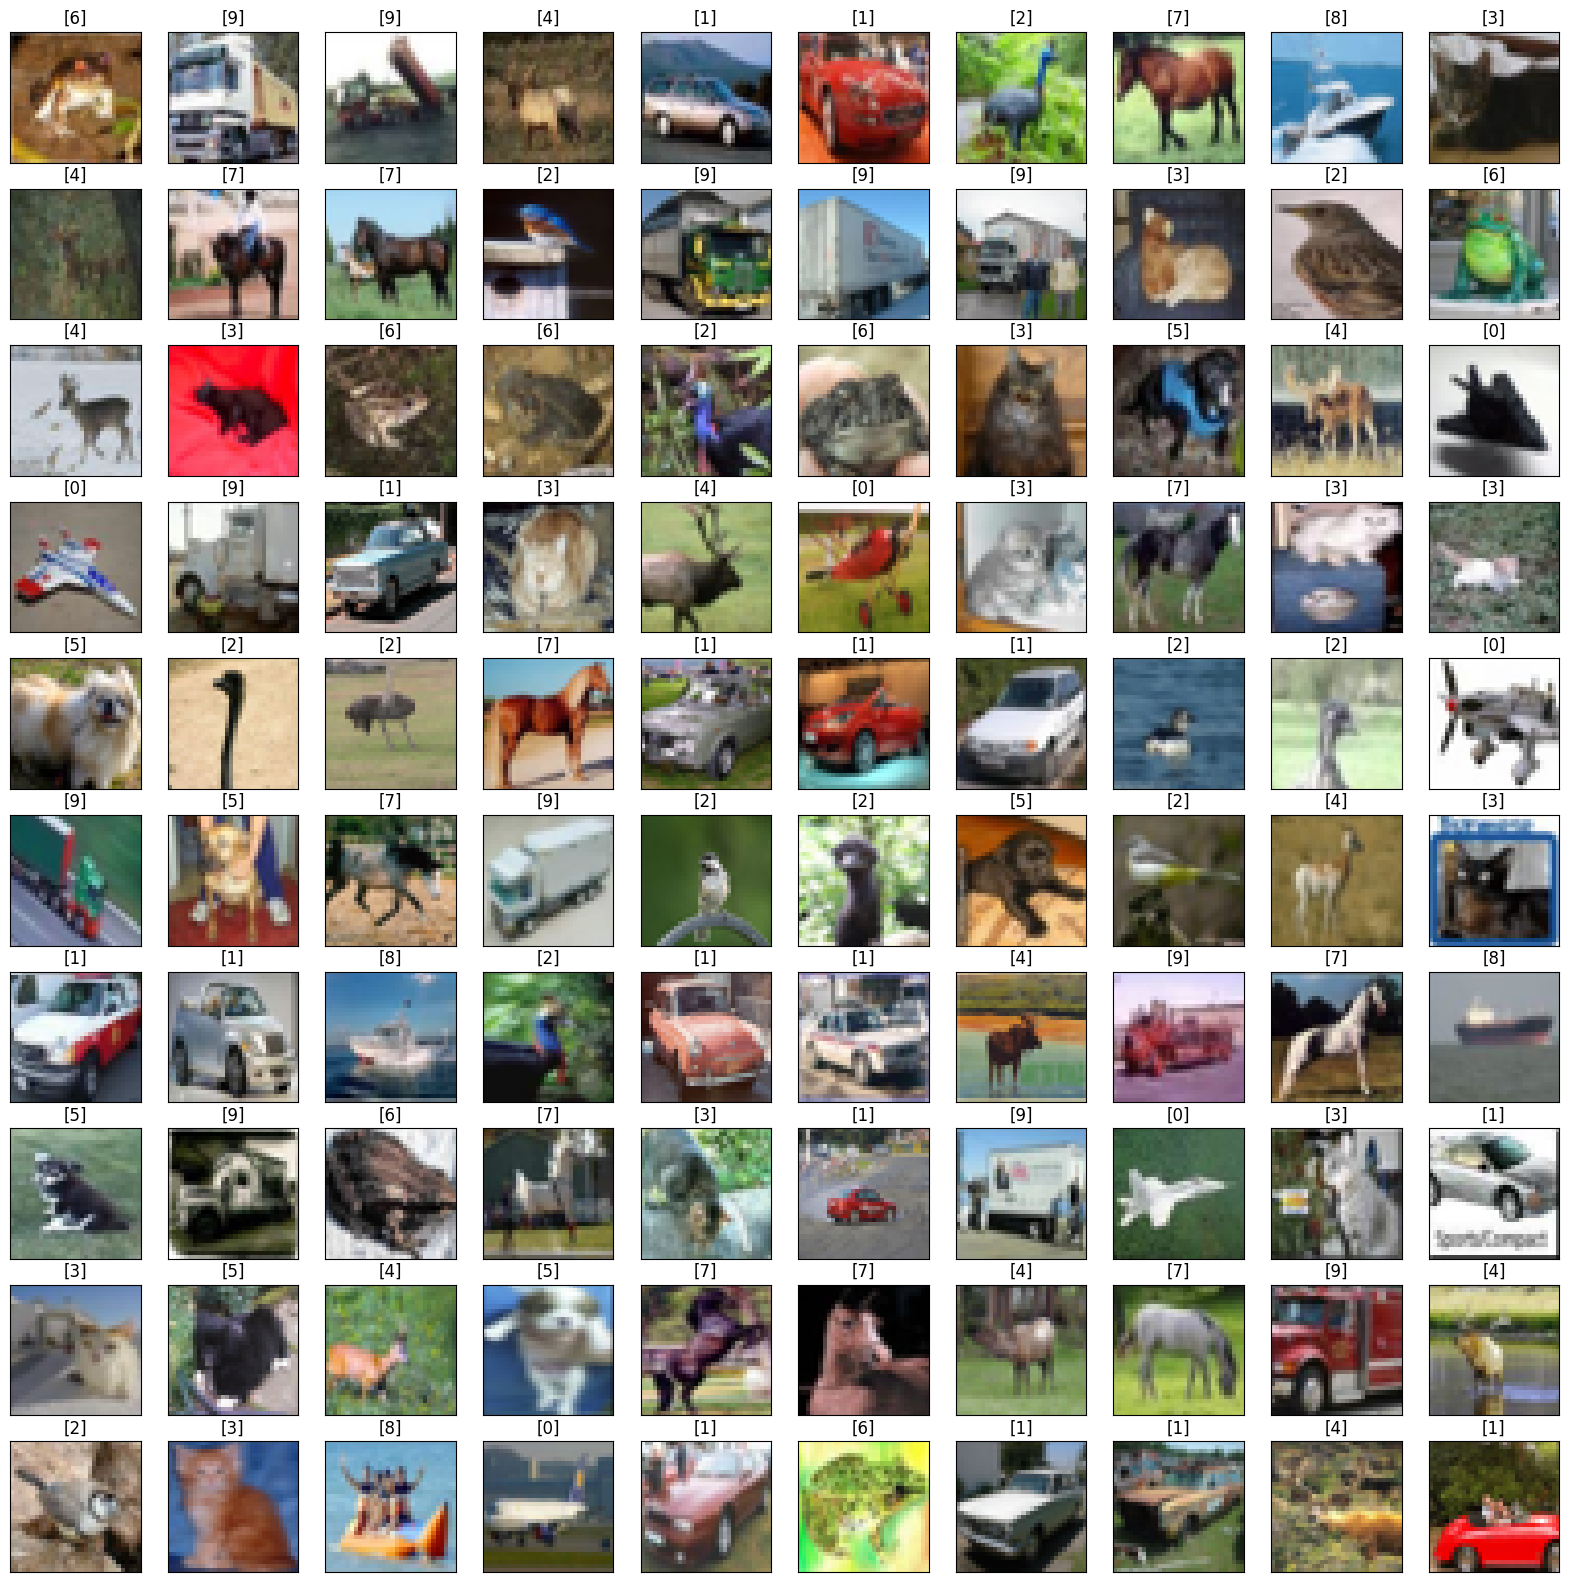

In [58]:
fig = plt.figure(figsize=(20,20))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])

In [11]:
img_shape = x_train.shape[1:]

In [12]:
img_shape

(32, 32, 3)

CNN Model

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32,padding ="same",kernel_size = (3,3),activation = "relu",input_shape = img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32,padding = "same",kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  #hidden layer 
                                                        #---->Fully connected layer
    layers.Dense(10, activation='softmax') #output layer 
])

In [14]:
cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [60]:
cnn.fit(x_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
500/500 [==============================] - 45s 89ms/step - loss: 0.3082 - accuracy: 0.8894
Epoch 2/10
500/500 [==============================] - 45s 90ms/step - loss: 0.3051 - accuracy: 0.8891
Epoch 3/10
500/500 [==============================] - 43s 86ms/step - loss: 0.3043 - accuracy: 0.8901
Epoch 4/10
500/500 [==============================] - 43s 87ms/step - loss: 0.3021 - accuracy: 0.8902
Epoch 5/10
500/500 [==============================] - 43s 86ms/step - loss: 0.2887 - accuracy: 0.8969
Epoch 6/10
500/500 [==============================] - 45s 91ms/step - loss: 0.2956 - accuracy: 0.8917
Epoch 7/10
500/500 [==============================] - 47s 94ms/step - loss: 0.2885 - accuracy: 0.8951
Epoch 8/10
500/500 [==============================] - 49s 99ms/step - loss: 0.2884 - accuracy: 0.8963
Epoch 9/10
500/500 [==============================] - 50s 100ms/step - loss: 0.2849 - accuracy: 0.8960
Epoch 10/10
500/500 [==============================] - 46s 93ms/step - loss: 0.27

In [62]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

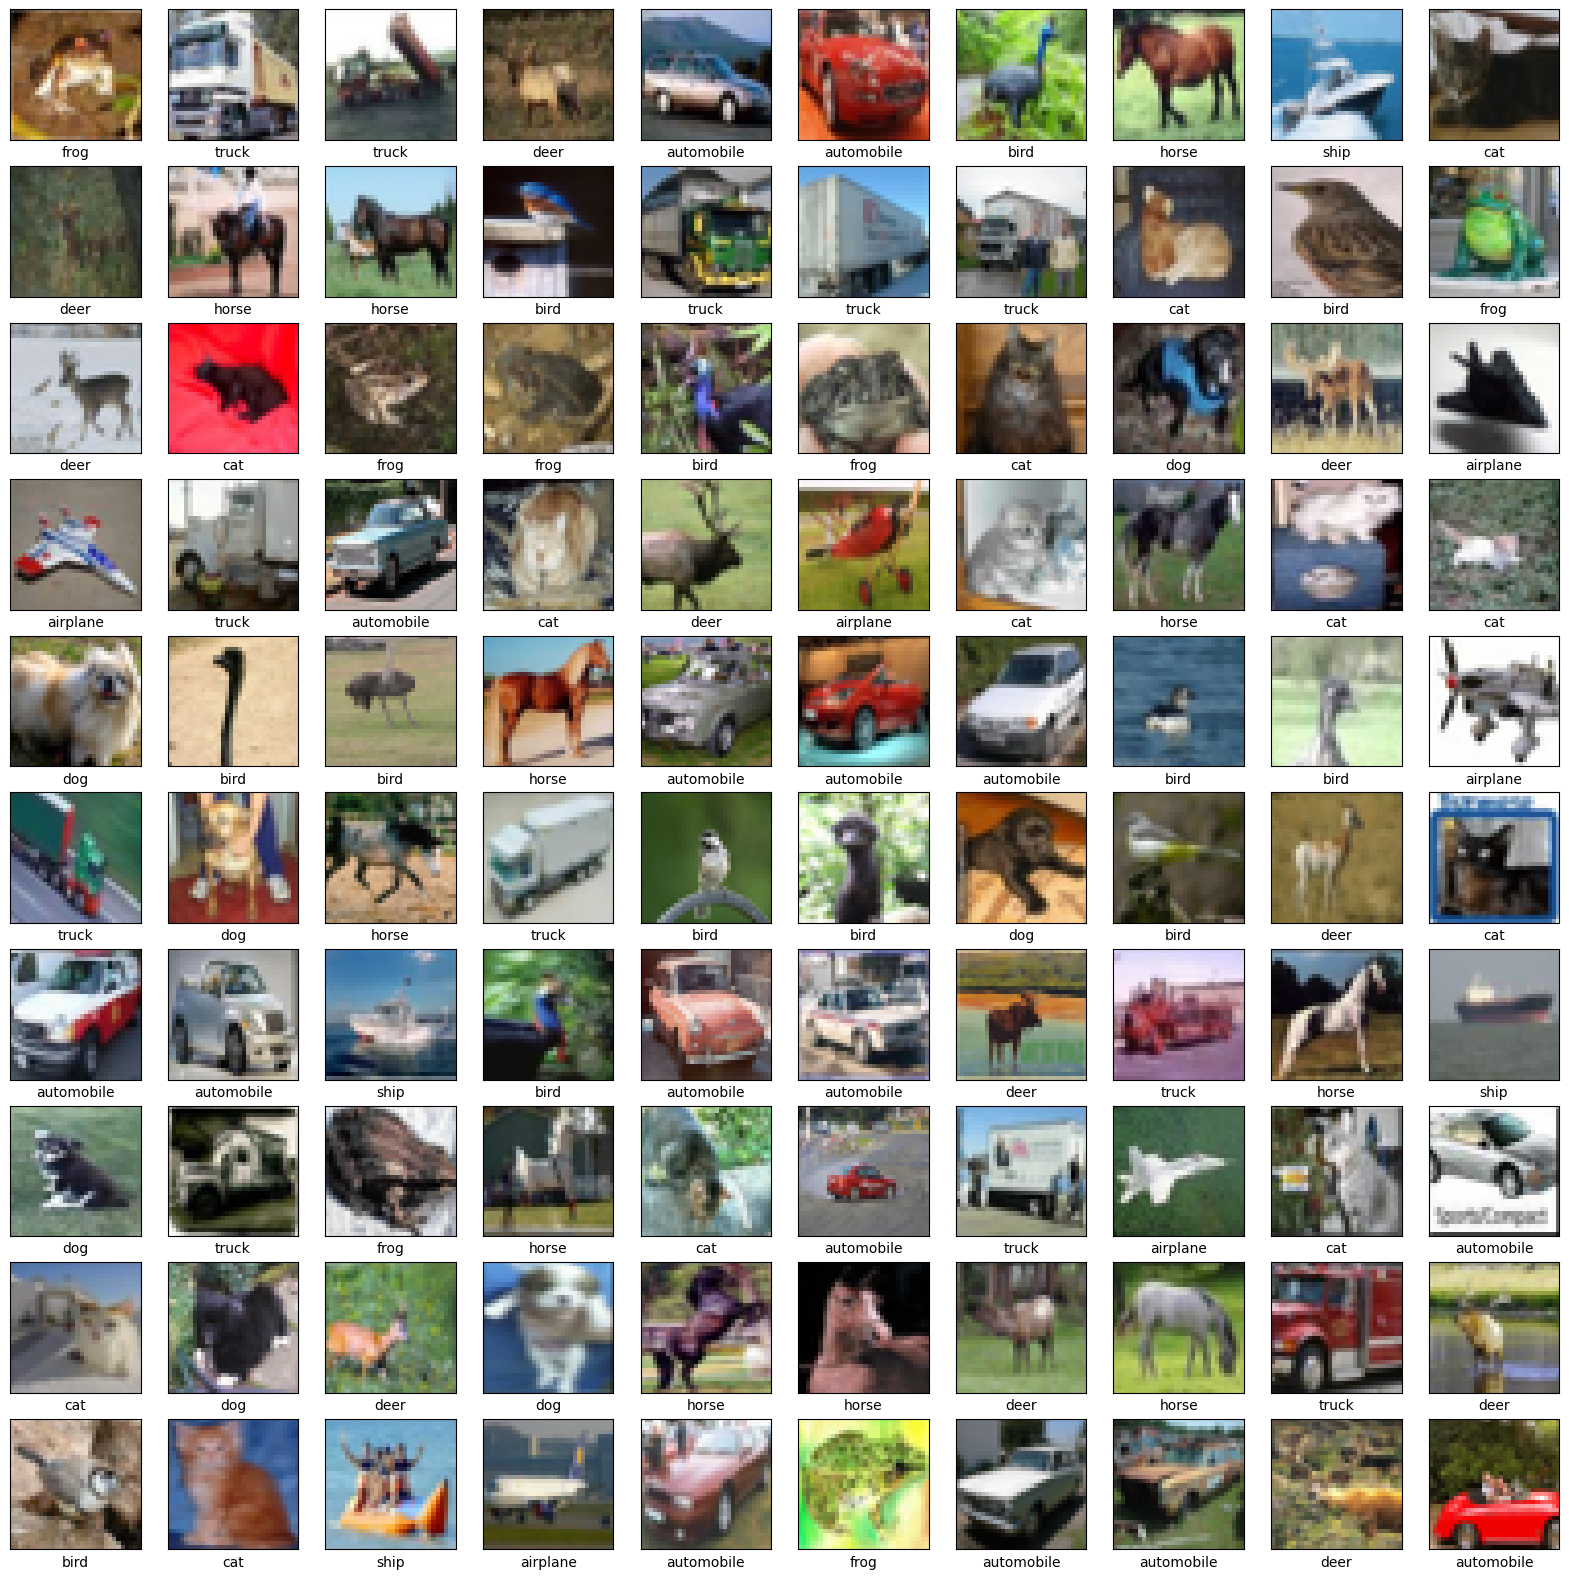

In [63]:
train=y_train
train = train.reshape(-1)
fig = plt.figure(figsize=(20,20))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_xlabel(classes[(train[i])])
    # ax.set_title(y_train[i])

In [64]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 8ms/step


array([[1.32876849e-05, 2.31513226e-08, 2.79869128e-04, 9.86738324e-01,
        2.84013026e-06, 1.26271723e-02, 2.99348525e-04, 5.11677953e-08,
        3.91416324e-05, 8.18913932e-08],
       [1.20470524e-02, 4.85414535e-01, 4.53999949e-09, 2.59408282e-08,
        6.50669492e-08, 1.01284354e-11, 3.64796518e-12, 1.41520309e-10,
        5.01580358e-01, 9.58026736e-04],
       [6.15027100e-02, 1.10587117e-03, 2.50048706e-05, 2.50616414e-03,
        2.67907330e-06, 7.17979054e-09, 2.05657939e-11, 6.91176069e-07,
        9.33204830e-01, 1.65196788e-03],
       [9.99850512e-01, 2.80821896e-05, 9.56727149e-07, 1.74444015e-08,
        6.03600228e-08, 1.65662505e-16, 1.11903292e-10, 9.93739596e-13,
        1.20208824e-04, 1.15516552e-09],
       [1.40649872e-12, 1.03997522e-08, 1.95543282e-03, 9.49149253e-04,
        4.30476144e-02, 3.81471273e-06, 9.54043984e-01, 1.36127012e-10,
        2.58948969e-08, 8.28251856e-10]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [66]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [67]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

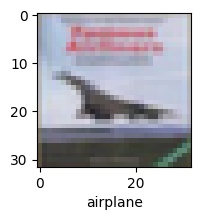

In [68]:
plot_sample(x_test, y_test.reshape(-1),3)


In [69]:
classes[y_classes[3]]

'airplane'

In [70]:
y_test[3]

array([0], dtype=uint8)

In [71]:
loss,accuracy=cnn.evaluate(x_test,y_test,verbose=1)
print(f'Accuracy:{accuracy*100}')

313/313 [==============================] - 3s 10ms/step - loss: 1.2763 - accuracy: 0.6985
Accuracy:69.84999775886536


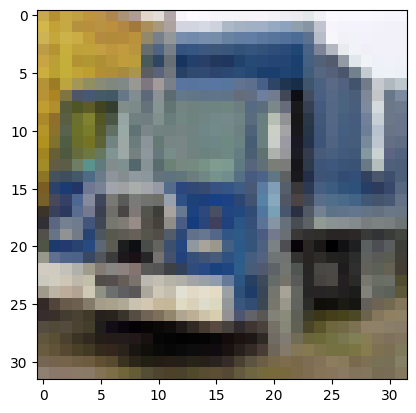

In [84]:
image=x_test[14]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [85]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])# 1 represent the batch size
print(image)                                                                   # shape[0]-height,shape[1]-width
                                                                   # SHAPE[2] - channel
p=cnn.predict(image)
print(f'predicted:{classes[np.argmax(p)]}')

[[[[0.78431374 0.6627451  0.29411766]
   [0.70980394 0.56078434 0.19215687]
   [0.7764706  0.654902   0.26666668]
   ...
   [0.972549   0.96862745 1.        ]
   [0.9647059  0.9607843  0.99215686]
   [0.9647059  0.9607843  0.99215686]]

  [[0.827451   0.7176471  0.29411766]
   [0.7607843  0.6313726  0.21568628]
   [0.78039217 0.6627451  0.26666668]
   ...
   [0.9529412  0.9490196  0.98039216]
   [0.9490196  0.94509804 0.9764706 ]
   [0.9490196  0.94509804 0.9764706 ]]

  [[0.8039216  0.7019608  0.32941177]
   [0.76862746 0.654902   0.23137255]
   [0.8039216  0.69803923 0.28627452]
   ...
   [0.9490196  0.94509804 0.9764706 ]
   [0.9490196  0.94509804 0.9764706 ]
   [0.9490196  0.94509804 0.9764706 ]]

  ...

  [[0.40784314 0.35686275 0.24705882]
   [0.3764706  0.3254902  0.21568628]
   [0.3372549  0.28235295 0.1882353 ]
   ...
   [0.49019608 0.44313726 0.31764707]
   [0.47843137 0.43529412 0.3254902 ]
   [0.49803922 0.48235294 0.3529412 ]]

  [[0.46666667 0.39607844 0.32941177]
   [0.4